# Statistical Analysis

In [1]:
pip install jupyterlab-rise

Note: you may need to restart the kernel to use updated packages.


# Spotify Audio Features

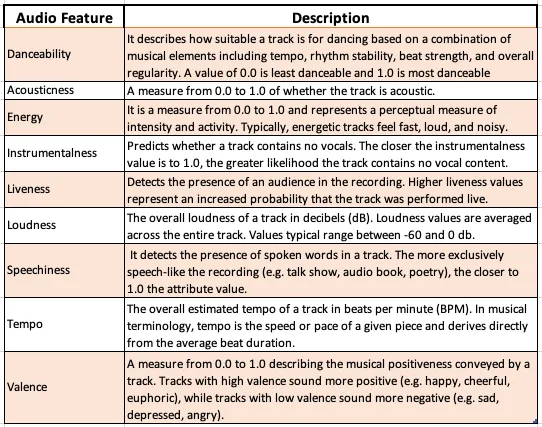

Source: https://medium.com/@krisna.renaldi_59979/how-pandemic-influence-our-mood-lets-ask-spotify-26e0867f6dca

### Overview
##### 1. Basic Stats

- **Most Common:**
  - Song, Artist, Country, Region, City
  
- **Extremes:**
  - Maximum and Minimum Audio Feature Values
  
- **Outliers:**
  - Identification and Implications

##### 2. Multiple Linear Regression
- **Relationship with Time of Day:**
  - Exploration of the relationship between Spotify audio features and time of day.

##### 3. Multiple Logistic Regression
- **Prediction of Location:**
  - Investigation into whether Spotify audio features can predict location.

##### 4. Gainesville vs. the Field
- *Description of comparison between Gainesville and other locations.*

# Libraries Used:

In [2]:
import sqlite3
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
import matplotlib
matplotlib.use('TkAGG')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
dbConnection = sqlite3.connect("1.db", check_same_thread=False)
cursor = dbConnection.cursor()

query = "SELECT * FROM Instances"

df = pd.read_sql_query(query, dbConnection)

# Most Common Values

In [4]:
def find_mode(**kwargs):
    for col_name, values in kwargs.items():
        most_common_name = values.value_counts().idxmax() #find most common value 
        mode = values.value_counts().max() #Find the count of the most common value
        print(f'The most common {values.name} is {most_common_name} and shows up {mode} times.')


find_mode(col1 = df['country'], col2 = df['song_name'], col3 = df['region'], col4 = df['city'], col5 = df['album_name'],
          col6 = df['artist_name'])


The most common country is United States and shows up 202 times.
The most common song_name is Tom Sawyer and shows up 3 times.
The most common region is Florida and shows up 120 times.
The most common city is Gainesville and shows up 73 times.
The most common album_name is Moving Pictures (2011 Remaster) and shows up 3 times.
The most common artist_name is Rush and shows up 3 times.


# Averages

In [5]:
def find_mean(col_name):
    mean = df[col_name].mean() #Get mean of column
    print(f'The mean {col_name} is {mean}.')

for col_name in df.columns[12:22]: #Iterate through Spotify audio features
    find_mean(col_name)

The mean acousticness is 0.22433319643916913.
The mean danceability is 0.5611035608308605.
The mean energy is 0.675099703264095.
The mean instrumentalness is 0.11952648394658755.
The mean liveness is 0.18821246290801186.
The mean loudness is -7.367869436201781.
The mean speechiness is 0.09611839762611278.
The mean tempo is 121.1906587537092.
The mean valence is 0.471419584569733.
The mean duration_ms is 240185.9169139466.


# Max and Min Values

In [6]:
def find_value_based_on_max(df, max_column, song_column, artist_column):
    
    max_value = df[max_column].max() # Find the maximum value of the max_column

    filtered_df = df[df[max_column] == max_value] # Make a new df with only the row with the max value

    song = filtered_df[song_column].iloc[0] # Retrieve the song name from the first row of the filtered_df

    artist = filtered_df[artist_column].iloc[0] # Retrieve the artist name from the first row of the filtered_df

    print(f'The song with the highest {max_column} is, {song} by {artist} with a value of {max_value}')

def find_value_based_on_min(df, min_column, song_column, artist_column):
    
    min_value = df[min_column].min() # Find the maximum value of the max_column
    
    filtered_df = df[df[min_column] == min_value] # Make a new df with only the row with the min value

    song = filtered_df[song_column].iloc[0] # Retrieve the song name from the first row of the filtered_df

    artist = filtered_df[artist_column].iloc[0] # Retrieve the artist name from the first row of the filtered_df

    print(f'The song with the lowest {min_column} is, {song} by {artist} with a value of {min_value}')


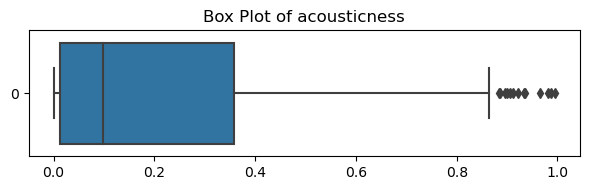

The song with the highest acousticness is, 7 Fantasien, Op. 116: No. 2 Intermezzo in A Minor by ['Johannes Brahms', 'Emil Gilels'] with a value of 0.995
The song with the lowest acousticness is, Sponge by Superheaven with a value of 1.12e-05


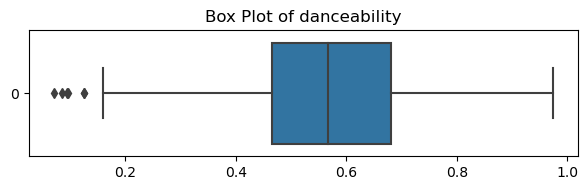

The song with the highest danceability is, Give It To Me by ['Timbaland', 'Justin Timberlake', 'Nelly Furtado'] with a value of 0.975
The song with the lowest danceability is, Tateishi by Devil Sold His Soul with a value of 0.0698


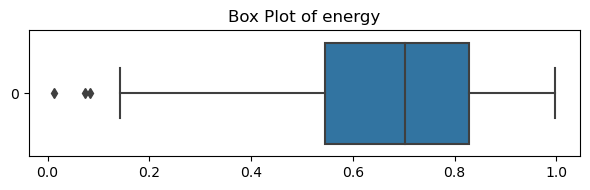

The song with the highest energy is, MC Mental at His Best by ['TheToxicLyfystyle', 'MC Mental'] with a value of 0.997
The song with the lowest energy is, 7 Fantasien, Op. 116: No. 2 Intermezzo in A Minor by ['Johannes Brahms', 'Emil Gilels'] with a value of 0.012


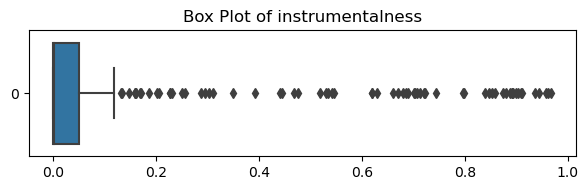

The song with the highest instrumentalness is, To Be Or Not To Be: Main Title - From "To Be Or Not To Be" by John Debney with a value of 0.968
The song with the lowest instrumentalness is, From the Start by Good Kid with a value of 0.0


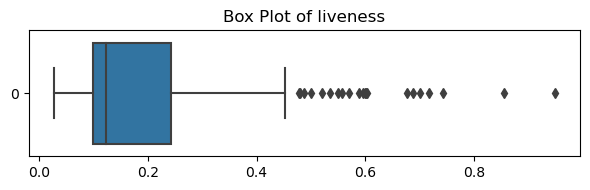

The song with the highest liveness is, There's More To Life Than This - Live At The Milk Bar Toilets by Björk with a value of 0.949
The song with the lowest liveness is, Cologne by beabadoobee with a value of 0.0266


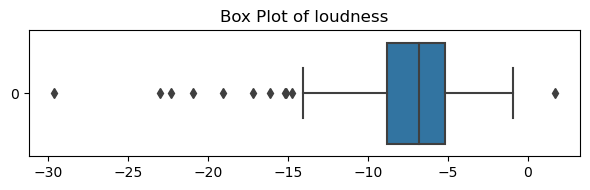

The song with the highest loudness is, MC Mental at His Best by ['TheToxicLyfystyle', 'MC Mental'] with a value of 1.684
The song with the lowest loudness is, 7 Fantasien, Op. 116: No. 2 Intermezzo in A Minor by ['Johannes Brahms', 'Emil Gilels'] with a value of -29.666


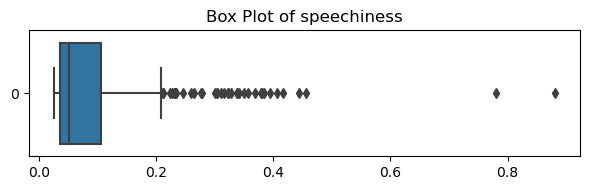

The song with the highest speechiness is, Siiiiiiiiilver Surffffeeeeer Intermission by Kanye West with a value of 0.881
The song with the lowest speechiness is, Schatten werfen keine Schatten by Tocotronic with a value of 0.0247


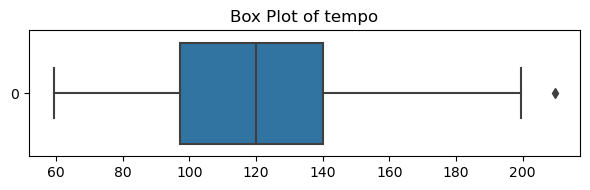

The song with the highest tempo is, Too Late - 2006 Remastered Version by Wire with a value of 209.636
The song with the lowest tempo is, Home by Enny Owl with a value of 59.279


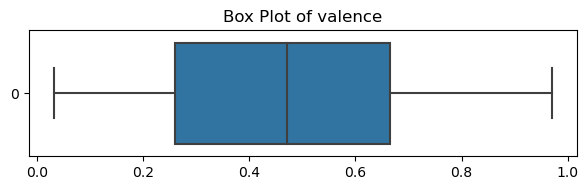

The song with the highest valence is, Etupirka, Angelica by ShibayanRecords with a value of 0.97
The song with the lowest valence is, A Child's Prayer by The Chapel Choir of the University of Glasgow with a value of 0.0307


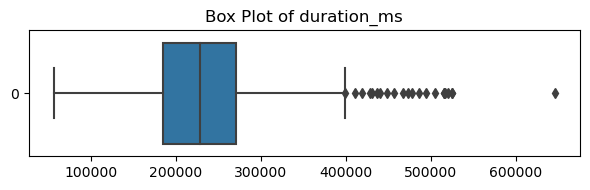

The song with the highest duration_ms is, Rival Dealer by Burial with a value of 645760
The song with the lowest duration_ms is, Siiiiiiiiilver Surffffeeeeer Intermission by Kanye West with a value of 56560


In [7]:
for col_name in df.columns[12:22]:
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df[col_name], orient='h') #Make a box plot for each spotify audio feature
    plt.title(f'Box Plot of {col_name}')
    plt.tight_layout()
    plt.show()
    
    find_value_based_on_max(df, col_name, 'song_name', 'artist_name')
    find_value_based_on_min(df, col_name, 'song_name', 'artist_name')

# Intro to Multiple Linear Regression:

Develops a model to describe relationship between multiple explanatory variables
    
Used to Predict Observations
    
Can determine which variables should be included in a model
    
General form of the Model: 
    $$ y = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 $$

In [8]:
def time_regress(**kwargs):
    
    beta = pd.concat([df[var] for var in kwargs.values()], axis=1) # Concatenate explanatory variables into a single DataFrame
    beta = sm.add_constant(beta) #Add parameters to model

    model = sm.OLS(df['localizedTime'], beta) # Fit the multiple regression model with localizedTime as the dependent variable
    results = model.fit()

    print(results.summary())
    
    print("Regression Model:")
    print("y =", end=" ")  # Print the beginning of the regression equation
    print(f"{results.params['const']:.4f}", end="")  # Print the intercept
    
    for i, var in enumerate(kwargs.values(), start=1):
        print(f" + {results.params[var]:.4f}({var})", end="") # Add the variables to the equation string
    return results
    

In [9]:
time_regress(var1='acousticness', var2='danceability', var3='energy', var4='instrumentalness', var5='liveness', var6='loudness', var7='speechiness', var8='tempo', var9='valence')


                            OLS Regression Results                            
Dep. Variable:          localizedTime   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.253
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0187
Time:                        21:28:48   Log-Likelihood:                -1045.3
No. Observations:                 337   AIC:                             2111.
Df Residuals:                     327   BIC:                             2149.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1371      3.268  

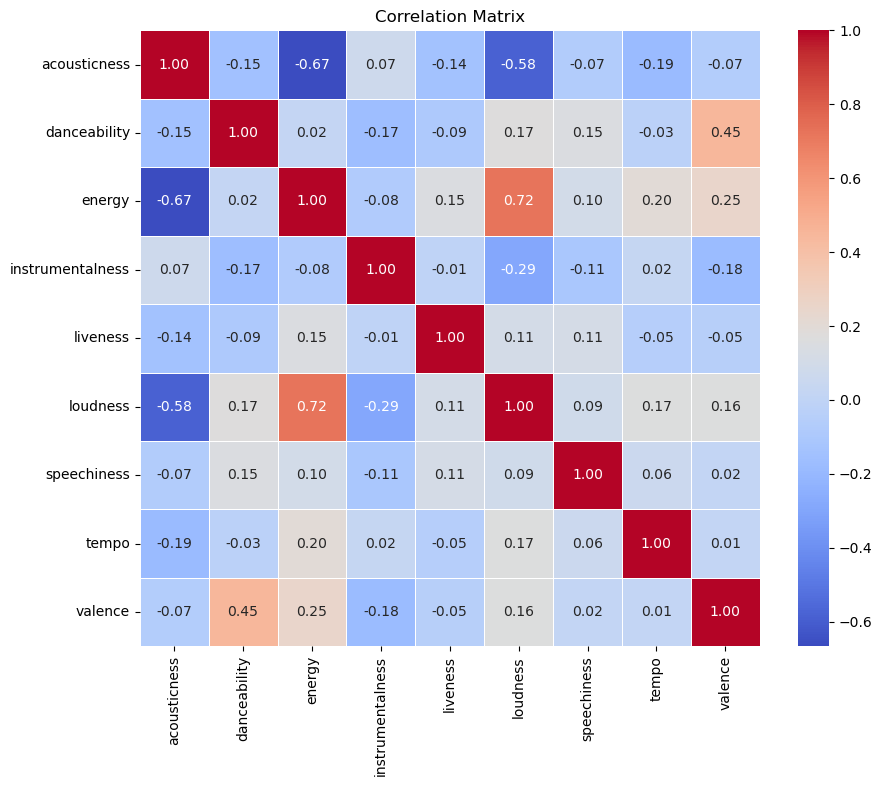

In [10]:
subset_df = df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]


correlation_matrix = subset_df.corr() # Make the correlation matrix

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Overview of Stepwise Regression

Stepwise Regression is a method used for fitting a regression model by iteratively adding or removing variables based on their statistical significance.

### Two Types of Stepwise Regression:

1. **Forward Selection:**
    - In Forward Selection, the regression starts with no variables included in the model. Variables are added one at a time, with each addition improving the model fit until no further improvement can be made.
2. **Backward Elimination:**
    - In Backward Elimination, the regression starts with all variables included in the model. Variables are removed one at a time, with each removal improving the model fit until no further improvement can be made.

Stepwise Regression is a useful technique for automatically selecting the most relevant variables for inclusion in a regression model, based on their contribution to model fit.

In [11]:
def backward_stepwise_regression(df, target, method, threshold=0.05):
    
    if method not in ['OLS', 'logit']:
        raise ValueError("Invalid method. Choose either 'OLS' or 'logit'.")

    
    explanatory_vars = list(subset_df.columns)
    
    beta = df[explanatory_vars]
    beta = sm.add_constant(beta) #add the spotify audio features as parameters
    
    y = df[target] #dependent variable
    
    # Fit the appropriate model
    if method == 'OLS':
        model = sm.OLS(y, beta)
    elif method == 'logit':
        model = sm.Logit(y, beta)
        
    results = model.fit()
    
    # Perform backward stepwise regression
    while True:
        max_p_value = results.pvalues.drop('const').max() # Find the variable with the highest p-value
        if max_p_value <= threshold:
            break  # Exit loop if all remaining variables have p-values below threshold

        max_p_var = results.pvalues.drop('const').idxmax() # finds the beta associated with the highest p-value 

        explanatory_vars.remove(max_p_var) # Remove the variable with the highest p-value
        beta = df[explanatory_vars]
        beta = sm.add_constant(beta)

        # Refit the model
        if method == 'OLS':
            model = sm.OLS(y, beta)
        elif method == 'logit':
            model = sm.Logit(y, beta)
        results = model.fit()

    print(results.summary())
    
    if method == 'OLS':
        print("Regression Model:")
        print("y =", end=" ")  # Print the beginning of the regression equation
        print(f"{results.params['const']:.4f}", end="")  # Print the intercept
    
    # Print the coefficients of the explanatory variables
        for var in explanatory_vars:
            print(f" + {results.params[var]:.4f}({var})", end="")
            
    elif method == 'logit':
        print("\nLogistic Regression Model Equation:")
        print("log(odds) = ", end="")
        print(f"{results.params['const']:.4f}", end="")
    
        for var in explanatory_vars:
            print(f" + {results.params[var]:.4f}({var})", end="")
            
    return results

                            OLS Regression Results                            
Dep. Variable:          localizedTime   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.666
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           0.000852
Time:                        21:28:48   Log-Likelihood:                -1047.1
No. Observations:                 337   AIC:                             2102.
Df Residuals:                     333   BIC:                             2117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.2135      1.678     12.645   

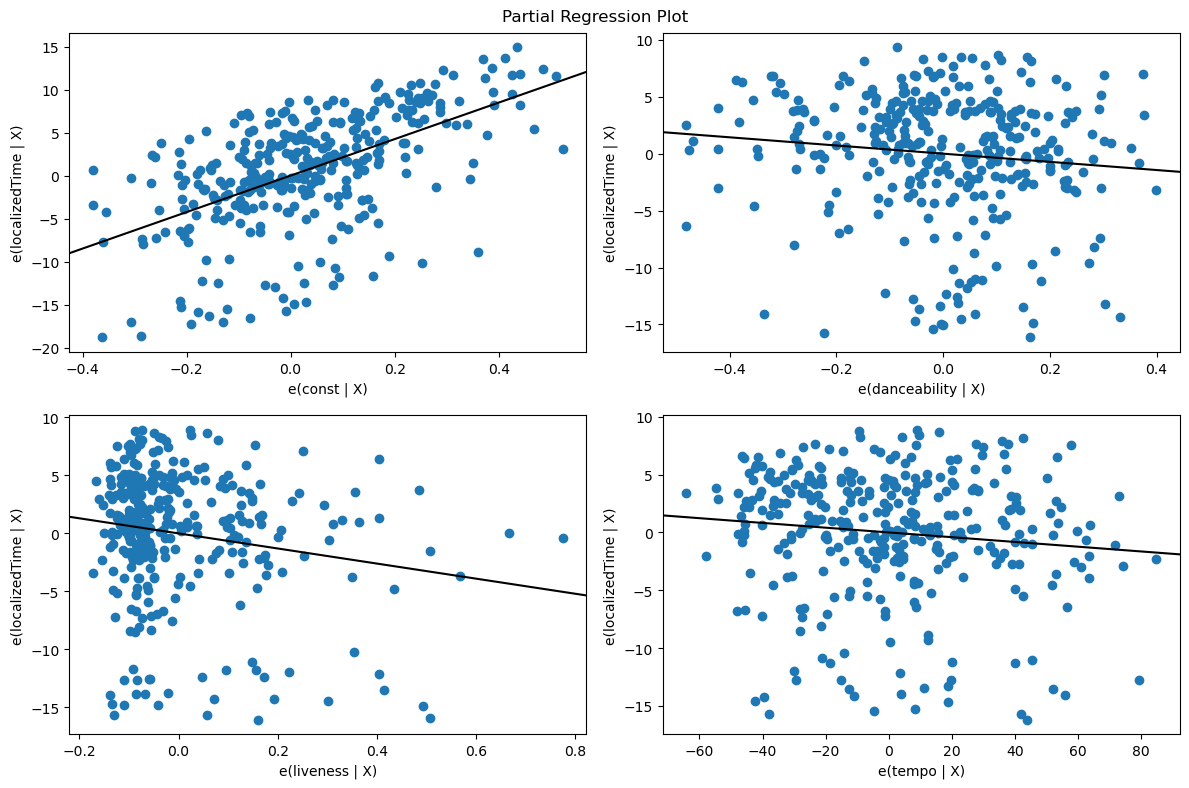

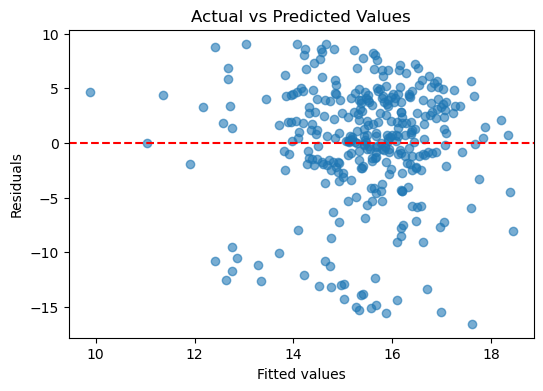

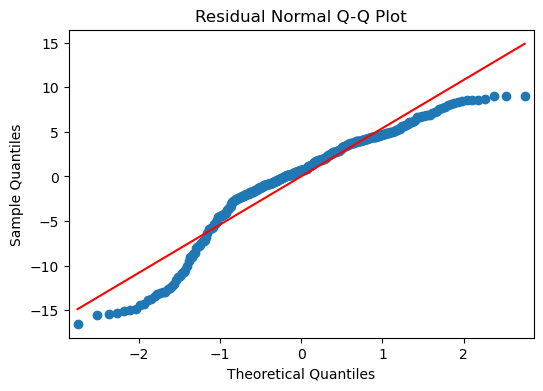

In [12]:
results = backward_stepwise_regression(df, 'localizedTime', 'OLS', threshold=0.05)

fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(results, fig=fig) #Plot partial regressions
plt.show()

# Plot actual vs predicted values
fig, ax = plt.subplots(figsize=(6, 4))
fitted_values = results.predict()
ax.scatter(fitted_values, results.resid, alpha=0.6)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Actual vs Predicted Values")
plt.show()

# Plot residual normal quantile plot
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(results.resid, line='s', ax=ax)
ax.set_title("Residual Normal Q-Q Plot")
plt.show()

# Intro to Multiple Logistic Regression:

Develops a model to describe relationship between multiple explanatory variables and a binary response variable
    
Used analyze the probability of an event occurring
    
Can determine which variables should be included in a model
    
General form of the Model: 
    $$ \log(\pi) = \beta_0 + \beta_1 \cdot X_1 + \beta_2 \cdot X_2 $$


In [13]:
#Make binary variables for locations
country_dummies = pd.get_dummies(df['country'], prefix='country')
region_dummies = pd.get_dummies(df['region'], prefix='region')
city_dummies = pd.get_dummies(df['city'], prefix='city')

#Add them to df
df = pd.concat([df, country_dummies], axis=1)
df = pd.concat([df, region_dummies], axis=1)
df = pd.concat([df, city_dummies], axis=1)

In [14]:
def prob_location(location, **kwargs):
    beta = pd.concat([df[predictor] for predictor in kwargs.values()], axis=1) #Parameters for regression
    
    y = df[location] #dependant variable

    # Fit the logistic regression model
    logit_model = sm.Logit(y, sm.add_constant(beta))
    logit_results = logit_model.fit()

    print(logit_results.summary())
    
    # Print the logistic regression model equation
    print("\nLogistic Regression Model Equation:")
    print("log(odds) = ", end="")
    print(f"{logit_results.params['const']:.4f}", end="")
    
    for var in beta.columns:
        print(f" + {logit_results.params[var]:.4f}({var})", end="")
    return logit_results

prob_location('country_United States', var1='acousticness', var2='danceability', var3='energy', var4='instrumentalness',
             var5='liveness', var6='loudness', var7='speechiness', var8='tempo', var9='valence')


Optimization terminated successfully.
         Current function value: 0.639742
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     country_United States   No. Observations:                  337
Model:                             Logit   Df Residuals:                      327
Method:                              MLE   Df Model:                            9
Date:                   Tue, 23 Apr 2024   Pseudo R-squ.:                 0.04977
Time:                           21:28:49   Log-Likelihood:                -215.59
converged:                          True   LL-Null:                       -226.89
Covariance Type:               nonrobust   LLR p-value:                  0.007197
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.3808      1.273      1.084      0.278      -1.115

In [15]:
backward_stepwise_regression(df, 'country_United States', 'logit')

Optimization terminated successfully.
         Current function value: 0.639742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640223
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640766
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.641384
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.642188
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.644522
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     country_United States   No. Observations:                  337
Model:                             Logit   Df Residuals:                      332
Method:                              MLE   Df Model:                            4
Date:                   Tue, 23 Apr 2024   Pseudo R-squ.:   

Optimization terminated successfully.
         Current function value: 0.671986
         Iterations 4


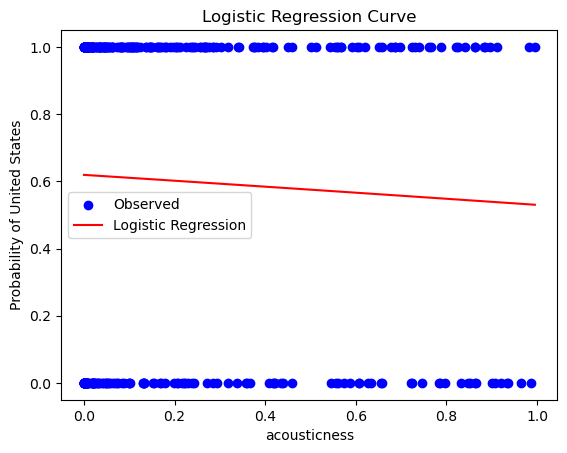

In [16]:
beta = df['acousticness']
y = df['country_United States']

# Fit the logistic regression model
beta_const = sm.add_constant(beta)  # Add constant term to predictor variable
logit_model = sm.Logit(y, beta_const)
logit_results = logit_model.fit()

# Generate predicted probabilities
beta_pred = np.linspace(beta.min(), beta.max(), 100)
beta_pred_const = sm.add_constant(beta_pred)  # Add constant term to predicted values
y_pred = logit_results.predict(beta_pred_const)

# Plot observed data and logistic regression curve
plt.scatter(beta, y, color='blue', label='Observed')
plt.plot(beta_pred, y_pred, color='red', label='Logistic Regression')
plt.xlabel('acousticness')
plt.ylabel('Probability of United States')
plt.title('Logistic Regression Curve')
plt.legend()
plt.show()

In [17]:
prob_location('city_Gainesville', var1='acousticness', var2='danceability', var3='energy', var4='instrumentalness',
             var5='liveness', var6='loudness', var7='speechiness', var8='tempo', var9='valence')


Optimization terminated successfully.
         Current function value: 0.511932
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       city_Gainesville   No. Observations:                  337
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                 0.02040
Time:                        21:28:50   Log-Likelihood:                -172.52
converged:                       True   LL-Null:                       -176.11
Covariance Type:            nonrobust   LLR p-value:                    0.6178
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4540      1.486     -0.979      0.328      -4.366       1.458
acousticnes

In [18]:
# Calculate means for audio features in Gainesville
gainesville_means = df[df['city_Gainesville'] == 1][['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].mean()

# Calculate means for audio features in other cities
other_cities_means = df[df['city_Gainesville'] == 0][['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].mean()

# Display the comparison
comparison_df = pd.DataFrame({
    'Gainesville': gainesville_means,
    'Other Cities': other_cities_means
})

print(comparison_df)

                  Gainesville  Other Cities
acousticness         0.251656      0.216778
danceability         0.591627      0.552663
energy               0.656712      0.680184
instrumentalness     0.117888      0.119980
liveness             0.182797      0.189710
loudness            -7.329836     -7.378386
speechiness          0.088959      0.098098
tempo              121.943479    120.982492
valence              0.508337      0.461211


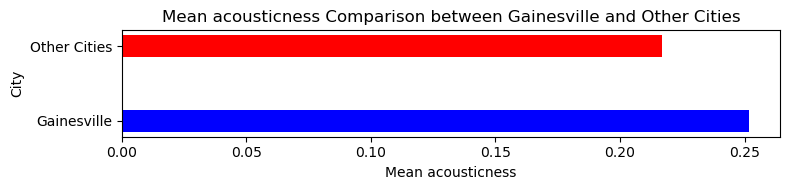

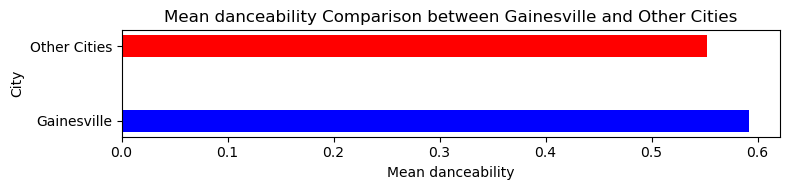

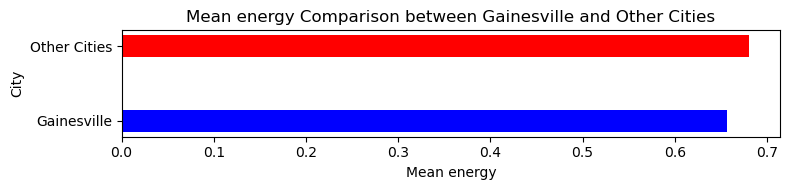

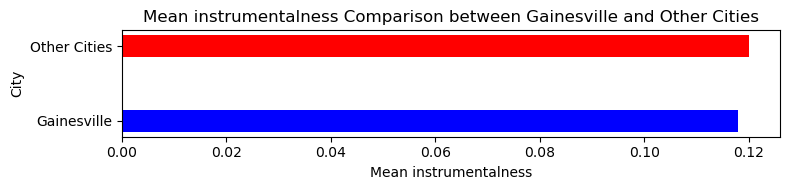

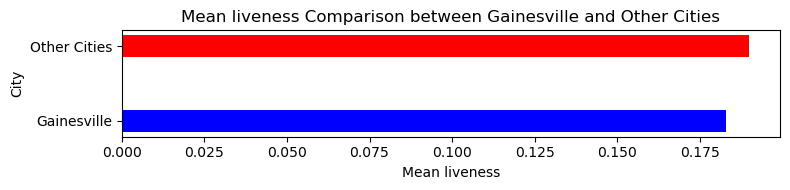

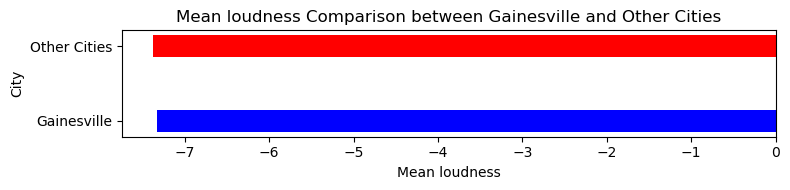

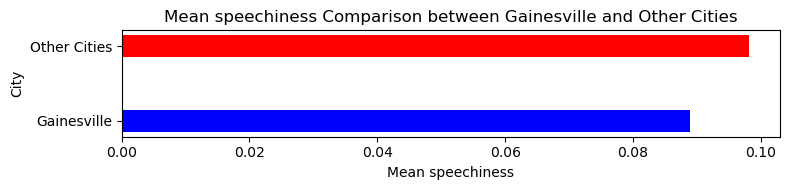

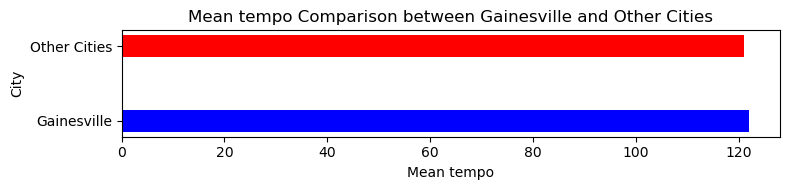

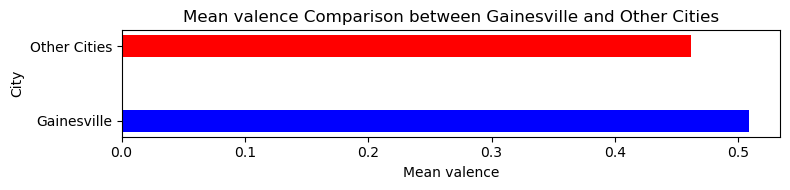

In [19]:
explanatory_vars = list(subset_df.columns)

#Plot horizontal bar graphs for each variable
for var in explanatory_vars:
    plt.figure(figsize=(8, 2))
    plt.barh(['Gainesville', 'Other Cities'], [gainesville_means[var], other_cities_means[var]], color=['blue', 'red'], height=0.3)
    plt.xlabel(f'Mean {var}')
    plt.ylabel('City')
    plt.title(f'Mean {var} Comparison between Gainesville and Other Cities')
    plt.tight_layout()
    plt.show()
